# DS105 Intermediate Stats Lesson 6 Hands On Solution

In [ ]:
# Install Packages
install.packages("rcompanion")
install.packages("car")
install.packages("IDPmisc")
install.packages("dplyr")

In [1]:
# Load Packages
library("rcompanion")
library("car")
library("IDPmisc")
library("dplyr")

Loading required package: carData


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# Load Data 
suicide = read.csv('../Data/suicide.csv')

## Number of suicides by generation by country, with country being the repeated factor

### Check Assumptions

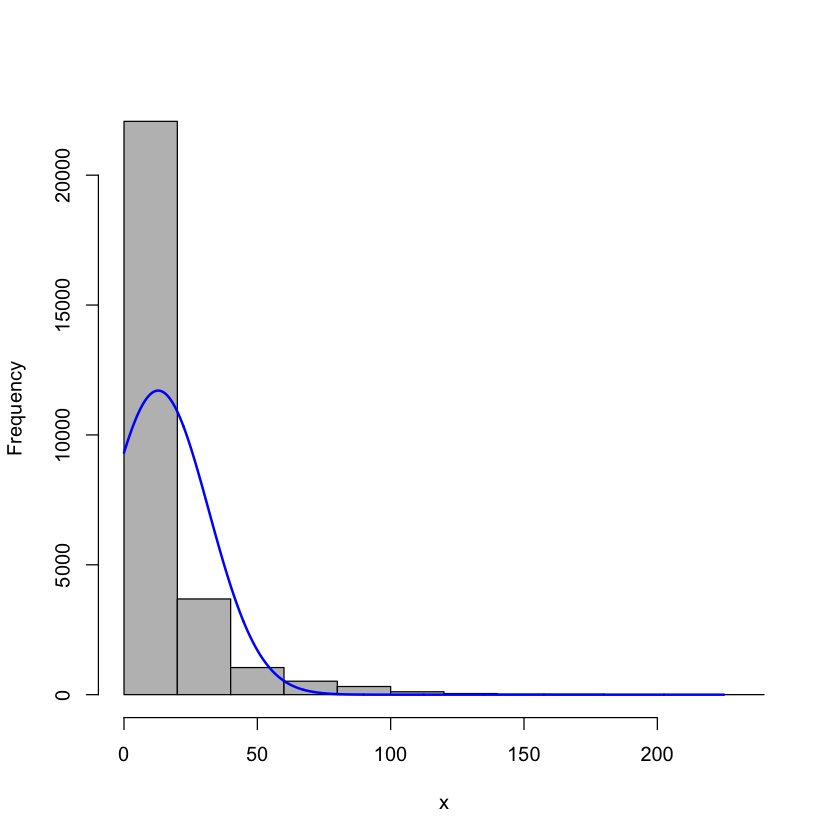

In [5]:
### Check for Normality
plotNormalHistogram(suicide$suicides.100k.pop)

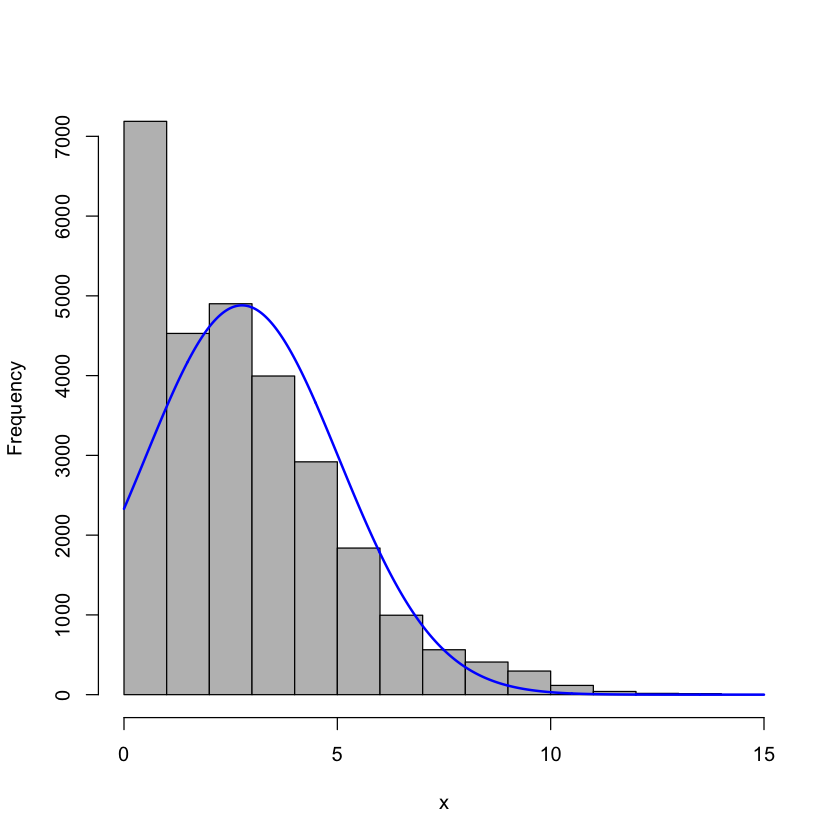

In [7]:
# use SQRT
suicide$suicides.100k.popSQRT <- sqrt(suicide$suicides.100k.pop)
plotNormalHistogram(suicide$suicides.100k.popSQRT)

In [8]:
# Use Log
suicide$suicides.100k.popLOG <- log(suicide$suicides.100k.pop)

In [9]:
# omit NAs
suicide4 <- NaRV.omit(suicide)

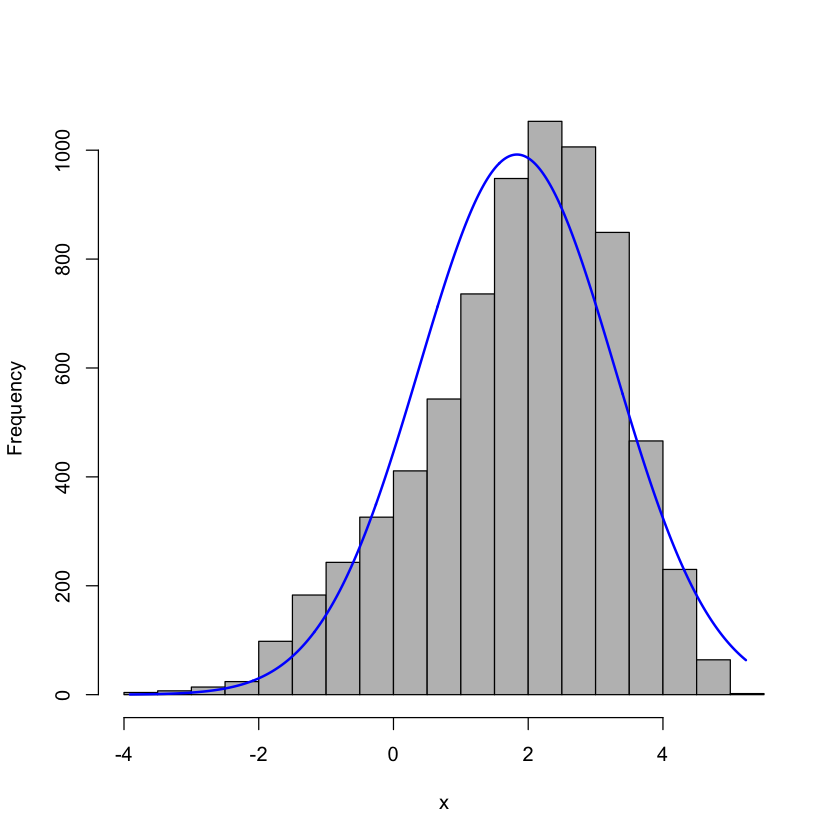

In [10]:
plotNormalHistogram(suicide4$suicides.100k.popLOG)

In [11]:
#use Log since it's more normally distributed

### Homogeneity of Variance

In [12]:
leveneTest(suicides.100k.popLOG ~ generation, data=suicide4)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,18.17709,5.712815e-18
,7201,NA,NA


#### This failed the assumption, but proceed anyway for learning purposes

### Sample size -you have more than enough data

## Run the analysis

ERROR: Error in eval(predvars, data, env): object 'weight' not found


In [15]:
RManova1 <- aov(suicides.100k.popLOG~(generation*year)+Error(i..country/(year)), suicide4)
summary(RManova1)

ERROR: Error in eval(predvars, data, env): object 'i..country' not found
